In [1]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

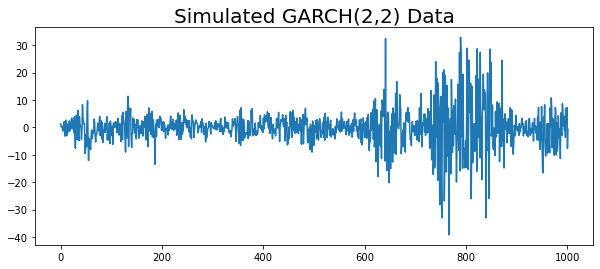

In [3]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

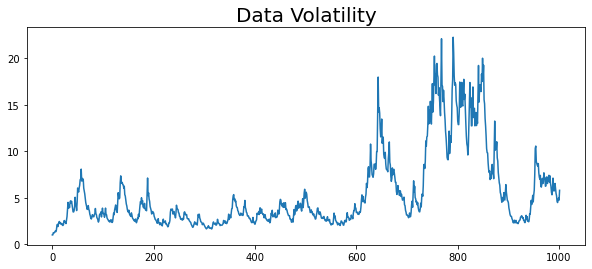

In [4]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

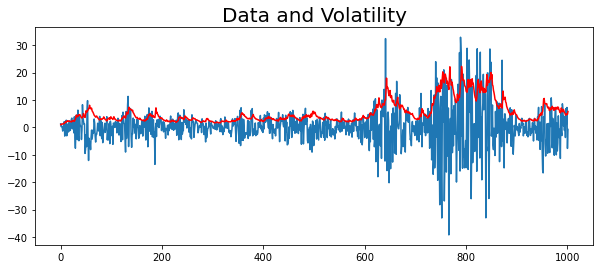

In [5]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

C:\Users\hp\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


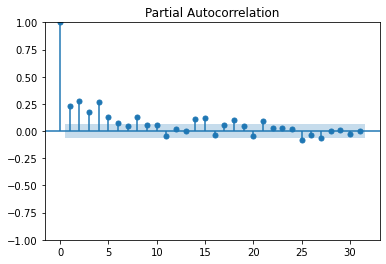

In [6]:
plot_pacf(np.array(series)**2)

plt.show()


In [7]:
train, test = series[:-test_size], series[-test_size:]
model = arch_model(train, p=2, q=2)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 551204727.5646992
Iteration:      2,   Func. Count:     17,   Neg. LLF: 5607.902696974164
Iteration:      3,   Func. Count:     26,   Neg. LLF: 3299.1769393744607
Iteration:      4,   Func. Count:     34,   Neg. LLF: 2683.608332297223
Iteration:      5,   Func. Count:     42,   Neg. LLF: 2689.5347913124874
Iteration:      6,   Func. Count:     50,   Neg. LLF: 2607.487758455044
Iteration:      7,   Func. Count:     57,   Neg. LLF: 2608.3908994577687
Iteration:      8,   Func. Count:     65,   Neg. LLF: 2612.019079585682
Iteration:      9,   Func. Count:     73,   Neg. LLF: 2605.867808826852
Iteration:     10,   Func. Count:     80,   Neg. LLF: 2605.8170678267024
Iteration:     11,   Func. Count:     87,   Neg. LLF: 2605.810520380938
Iteration:     12,   Func. Count:     94,   Neg. LLF: 2605.809946318634
Iteration:     13,   Func. Count:    101,   Neg. LLF: 2605.809939887985
Iteration:     14,   Func. Count:    107,   Neg. LLF: 2605.8

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2605.81
Distribution:                  Normal   AIC:                           5223.62
Method:            Maximum Likelihood   BIC:                           5252.45
                                        No. Observations:                  902
Date:                Wed, Mar 30 2022   Df Residuals:                      901
Time:                        15:01:43   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0439      0.106      0.414      0.679 [ -0.164,  0.252]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.4216      0.253      1.669  9.502e-02 [-7.336e-02,  0.917]
alpha[1]       0.0762  5.874e-02      1.297      0.194 [-3.892e-02,  0.191]
alpha[2]       0.1748      0.107      1.632      0.103 [-3.510e-02,  0.385]
beta[1]        0.7490      0.914      0.819      0.413    [ -1.043,  2.541]
beta[2]    2.3635e-15      0.773  3.057e-15      1.000    [ -1.515,  1.515]
===========================================================================

Covariance estimator: robust
"""

C:\Users\hp\miniconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\hp\miniconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


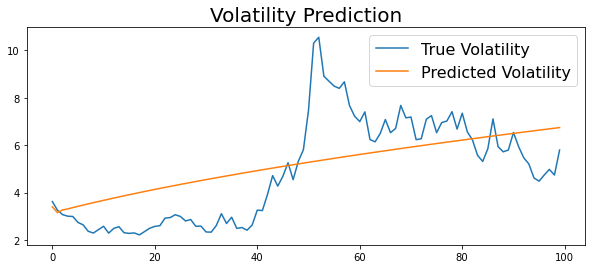

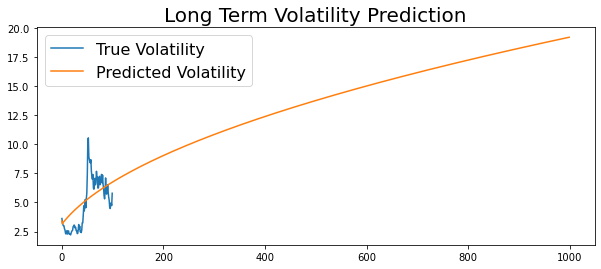

In [8]:
predictions = model_fit.forecast(horizon=test_size)

## prediction à court terme

plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

## prediction à long terme
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

In [9]:
from arch.__future__ import reindexing
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

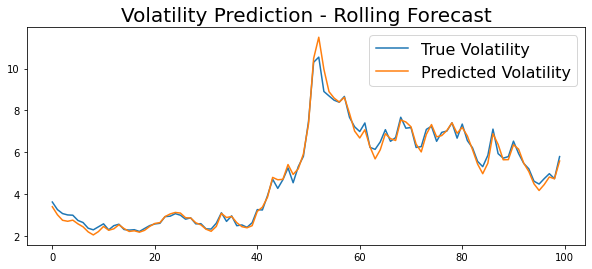

In [10]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)